## AR Model

In [3]:
## Ice cream production data
import pandas as pd
df=pd.read_csv("ice_cream.csv")

In [13]:
df.dtypes

production    float64
dtype: object

In [4]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
rename_map={"Date":"date","IPN31152N":"production"}
df.rename(columns=rename_map,inplace=True)

In [7]:
df.head()

,DATE,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [8]:
df.set_index("DATE",inplace=True)

In [14]:
## Subset the data from 2010 t0 2020
start_date="2010-01-01"
df=df[start_date:]

In [15]:
df.head()

,production
DATE,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [20]:
df.index = pd.to_datetime(df.index)

In [24]:
df.shape

(121, 1)

<Axes: xlabel='DATE'>

<Figure size 1300x500 with 0 Axes>

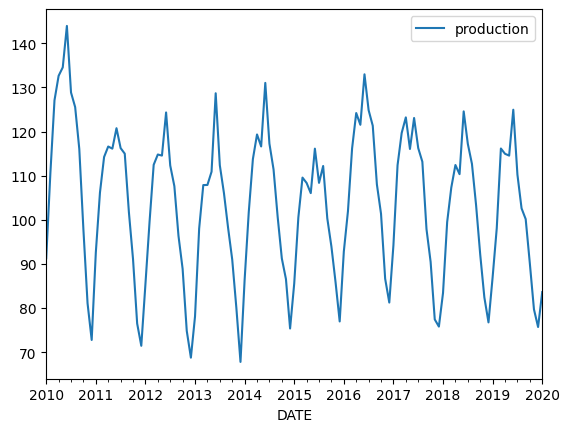

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
df.plot()

## ACF Plot

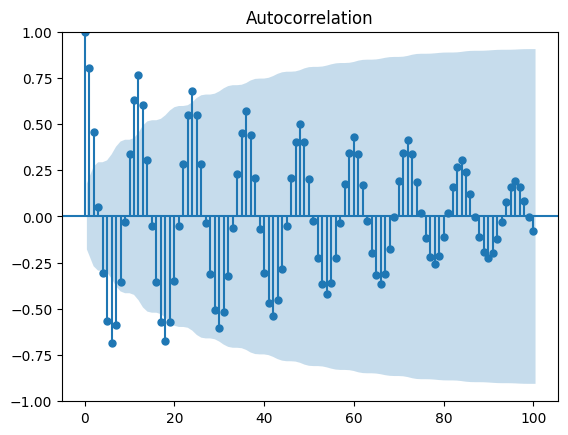

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot=plot_acf(df,lags=100)

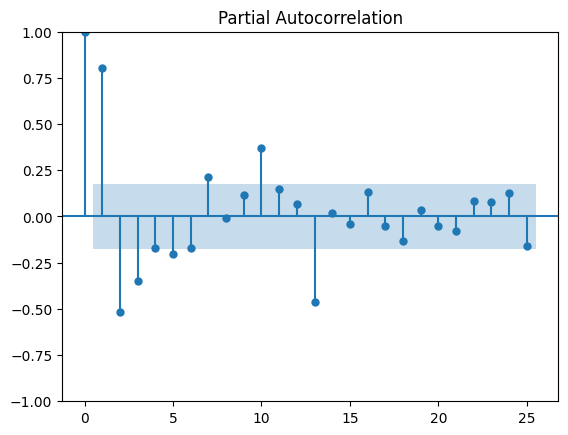

In [41]:
pacf_plot=plot_pacf(df,lags=25)

## Get the training and the testing datasets

In [44]:
from datetime import datetime
train_end=datetime(2018, 12, 1)
test_end=datetime(2019, 12, 1)
train_data=df[:train_end]
test_data=df[train_end+pd.DateOffset(months=1):test_end]

In [45]:
test_data

,production
DATE,
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718
2019-04-01,114.9703
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,100.1741


In [49]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_data,order=(3,0,0))
model_fit=model.fit()
model_fit.summary()

c:\Users\soundarya.sarathi\anaconda3\envs\mlts\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Sun, 22 Sep 2024   AIC                            758.170
Time:                        12:37:05   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.765      -0.396       0.291
ar.L3         -0.4044      0.123     -3.290      0.001      -0.645      -0.164
sigma2        58.4026      9.475      6.164      0.000      39.831      76.974
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 8.71
Prob(Q):                              0.43   Prob(JB):                         0.01
Heteroskedasticity (H):               0.76   Skew:                             0.70
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

lesser the p value(usually 0.05), the more significant it is in our prediction

so lag2 is not that important

### predict on the test data

In [50]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)

In [51]:
predictions

2019-01-01     81.236249
2019-02-01     90.140510
2019-03-01    101.523172
2019-04-01    111.164049
2019-05-01    117.060582
2019-06-01    118.125846
2019-07-01    115.033483
2019-08-01    109.355515
2019-09-01    103.142077
2019-10-01     98.184812
2019-11-01     95.616387
2019-12-01     95.699737
Freq: MS, Name: predicted_mean, dtype: float64

In [53]:
residuals=test_data["production"]-predictions

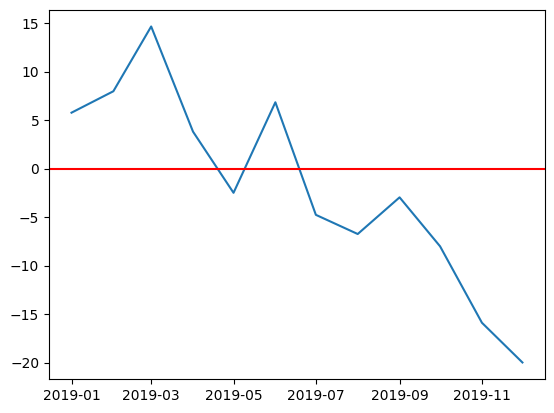

In [58]:
plt.plot(residuals)
plt.axhline(y=0,color="red")

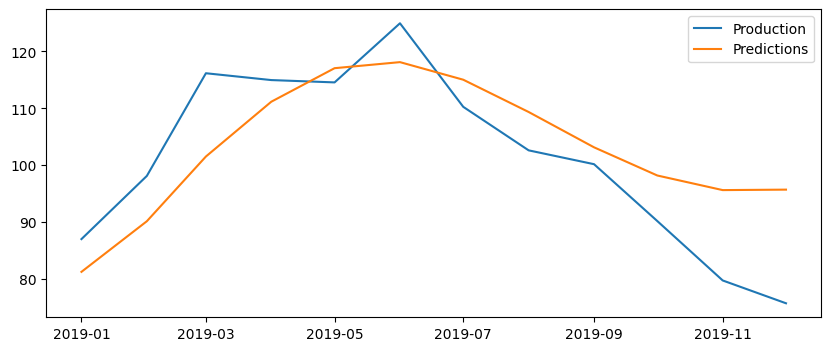

In [59]:
plt.figure(figsize=(10,4))
plt.plot(test_data.index,test_data["production"],label="Production")
plt.plot(test_data.index,predictions,label="Predictions")
plt.legend()
plt.show()

In [60]:
import numpy as np
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))


Mean Absolute Percent Error: nan


In [61]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Root Mean Squared Error: 9.884158751659836


it is not a very good fit
